In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate random linear data
x = np.linspace(0.,1.,100)

#   a   * x + b   + random noise
y = 0.1 * x + 0.5 + np.random.uniform(-.05,.05,100)

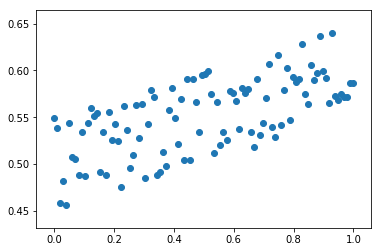

In [3]:
# Plot the random sample
plt.scatter(x,y)
plt.show()

# Closed form formula

$\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}$

$\hat{\beta} = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n} (x_{i} - \bar{x})^{2}}$

$y = \alpha + \beta x$

In [4]:
x_mean = x.mean()
y_mean = y.mean()

beta_hat = sum((x - x_mean) * (y - y_mean)) / sum((x - x_mean) ** 2)
alpha_hat = y_mean - beta_hat*x_mean

print('y = {} + {}x'.format(alpha_hat, beta_hat))

y = 0.5080651069914707 + 0.08703406007318465x


In [5]:
def f(x, a, b):
    return a + x * b

true_y = f(x, alpha_hat, beta_hat)

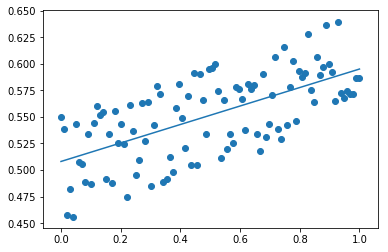

In [6]:
plt.plot(x, true_y)
plt.scatter(x,y)
plt.show()

# Machine learning method

Basic loss formula:

$\mathcal{L} = \frac{1}{n} \sum_{n}^{i=1}(y_{i} - \hat{y_{i}})^{2}$

Implementing predictive calculation in loss formula:

$w = \beta$

$b = \alpha$

$\mathcal{L} = \frac{1}{n} \sum_{n}^{i=1}(y_{i} - (w^{T}x_{i} + b))^{2}$

Derivative w.r.t. $w$

$\frac{\partial \mathcal{L}}{\partial w} = -\frac{1}{n} \sum_{n}^{i=1}2x_{i}(y_{i} - (w^{T}x_{i} + b))$

Derivative w.r.t. $b$

$\frac{\partial \mathcal{L}}{\partial b} = -\frac{1}{n} \sum_{n}^{i=1}2(y_{i} - (w^{T}x_{i} + b))$

Gradient descent:

$w_{i} = w_{i-1} - \alpha \frac{\partial \mathcal{L}}{\partial w}$

$b_{i} = b_{i-1} - \alpha \frac{\partial \mathcal{L}}{\partial b}$

Add another feature (the bias) to x, and remove the $b$ parameter. Removes need for $\frac{\partial \mathcal{L}}{\partial b}$ and simplifies $\frac{\partial \mathcal{L}}{\partial w}$ to:

$\frac{\partial \mathcal{L}}{\partial w} = -\frac{1}{n} \sum_{n}^{i=1}2x_{i}(y_{i} - (w^{T}x_{i}))$

We can also remove the multiplication by 2 as it is only a scalar for the output, and not a relevant variable. 

$\frac{\partial \mathcal{L}}{\partial w} = -\frac{1}{n} \sum_{n}^{i=1}x_{i}(y_{i} - (w^{T}x_{i}))$

In [7]:
def calc_gradient(x,y,w):
    y_hat = x.dot(w)
    error = y - y_hat
    
    gradient = -(1/len(x)) * error.dot(x)
    return gradient, np.sum(error)**2
    

In [8]:
# Add bias feature to x
bias_feature = np.ones(x.shape)

x_plus_bias = np.column_stack((bias_feature, x))

In [9]:
# Gradient descent
alpha = 0.1
tolerance = 1e-5

w = np.ones(2)

# Plotting and debugging stacks/counters
error_stack = []
iters = 0

while True:
    gradient, error = calc_gradient(x_plus_bias,y,w)
    
    old_w = w
    
    w = w - alpha * gradient
    
    if abs(sum(old_w - w)) < tolerance:
        print("Finished SGD with parameter set w = {}".format(w))
        break
    else:
        iters += 1
        error_stack.append(error)
        
        if iters % 100 == 0:
            print("Now at iteration {} with an error of {}".format(iters, error))

Now at iteration 100 with an error of 0.8669401372955907
Now at iteration 200 with an error of 0.2258265231751113
Now at iteration 300 with an error of 0.05880676684656184
Now at iteration 400 with an error of 0.015313683156569408
Now at iteration 500 with an error of 0.003987787535262208
Now at iteration 600 with an error of 0.0010384470714070281
Now at iteration 700 with an error of 0.00027041869973709604
Finished SGD with parameter set w = [0.50635962 0.09021632]


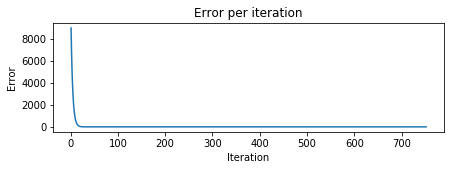

In [18]:
errorplot_x = np.arange(1, len(error_stack)+1)
plt.figure(figsize=(7,2))
plt.plot(errorplot_x, error_stack)
plt.title("Error per iteration")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

# Comparison of two methods

In [11]:
print("Parameters found by closed form method:\nalpha: {}\tbeta: {}".format(alpha_hat, beta_hat))
print("Parameters found with the machine learning method:\nalpha: {}\tbeta: {}".format(w[0], w[1]))

Parameters found by closed form method:
alpha: 0.5080651069914707	beta: 0.08703406007318465
Parameters found with the machine learning method:
alpha: 0.5063596233652177	beta: 0.09021632294072308


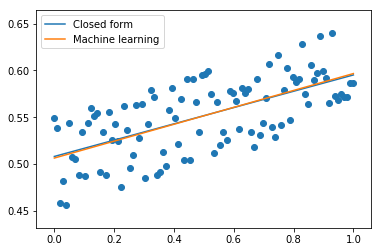

In [19]:
closed_form_predicted_line = f(x, alpha_hat, beta_hat)
ml_predicted_line = f(x, w[0], w[1])

plt.scatter(x,y)

plt.plot(x, closed_form_predicted_line, label='Closed form')
plt.plot(x, ml_predicted_line, label='Machine learning')

plt.legend()
plt.show()